<img src="https://upload.wikimedia.org/wikipedia/commons/4/47/Logo_UTFSM.png" width="200" alt="utfsm-logo" align="left"/>

# MAT281
### Aplicaciones de la Matemática en la Ingeniería

## Módulo 04
## Laboratorio Clase 02: Regresión Lineal

### Instrucciones


* Completa tus datos personales (nombre y rol USM) en siguiente celda.
* La escala es de 0 a 4 considerando solo valores enteros.
* Debes _pushear_ tus cambios a tu repositorio personal del curso.
* Como respaldo, debes enviar un archivo .zip con el siguiente formato `mXX_cYY_lab_apellido_nombre.zip` a alonso.ogueda@gmail.com, debe contener todo lo necesario para que se ejecute correctamente cada celda, ya sea datos, imágenes, scripts, etc.
* Se evaluará:
    - Soluciones
    - Código
    - Que Binder esté bien configurado.
    - Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

__Nombre__: Eduardo Rubio Marín

__Rol__: 201510005-5

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

## Ejercicio 1: Diabetes

Realizar análisis de regresión a los datos de diabetes disponibles en scikit-learn

In [2]:
diabetes = datasets.load_diabetes()
print(dir(diabetes))  ## Atributos

['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']


In [3]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [4]:
diabetes_df = (
    pd.DataFrame(
        diabetes.data,
        columns=diabetes.feature_names
    )
    .assign(prog=diabetes.target)
)

diabetes_df.head()


In [5]:
diabetes_df['sex']

0      0.050680
1     -0.044642
2      0.050680
3     -0.044642
4     -0.044642
         ...   
437    0.050680
438    0.050680
439    0.050680
440   -0.044642
441   -0.044642
Name: sex, Length: 442, dtype: float64

#### Pregunta 1 (1 pto):

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?

Tienen esos valores porque se estandarizaron valores cuantitativos 0 y 1 para el sexo de las personas.

La columna a predecir es "prog" que representa la progresión de diabetes.

#### Pregunta 2 (1 pto)

Realiza una regresión lineal con todas las _features_ incluyendo intercepto.

In [6]:
X = diabetes_df.drop(columns="prog").values
y = diabetes_df[("prog")].values

Ajusta el modelo

In [8]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Imprime el intercepto y los coeficientes luego de ajustar el modelo.

In [9]:
print(f"Intercept: \n{regr.intercept_}\n")
print(f"Coefficients: \n{regr.coef_}\n")

Intercept: 
152.1334841628965

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]



Haz una predicción del modelo con los datos `X`.

In [10]:
y_pred = regr.predict(X)

Calcula e imprime el error cuadrático medio y el coeficiente de determinación de este modelo ajustado.

In [11]:
# Error cuadrático medio
print(f"Mean squared error:{ mean_squared_error(y,y_pred):.2f}\n")

# Coeficiente de determinación
print(f"Coefficient of determination: {regr.score(X,y):.2f}\n")

Mean squared error:2859.69

Coefficient of determination: 0.52



**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

Con R² menor a 0.8 se puede decir que no es muy bueno.

### Pregunta 3 (2 ptos).

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [12]:
for i in range(X.shape[1]):
    X_i = X[:, np.newaxis, i]  # Protip! Trata de entender este paso por tu cuenta, es muy clever
    regr_i = LinearRegression(fit_intercept=True)
    regr_i.fit(X_i,y)
    y_pred_i = regr_i.predict(X_i)
    print(f"{diabetes_df.columns[i]}:")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(y_pred_i,y):.2f}")
    print(f"\tCoefficient of determination: {regr_i.score(X_i, y):.2f}\n")

age:
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

sex:
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

bmi:
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

bp:
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

s1:
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

s2:
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

s3:
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

s4:
	Coefficients: [696.88303009]
	Intercept: 152.13348416289568
	Mean squared erro

**Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

Eligiría bmi por tener el mayor R², aun asi ninguno tiene un R² muy bueno pero bmi es el mas alto.

Con la feature escogida haz el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefiera.

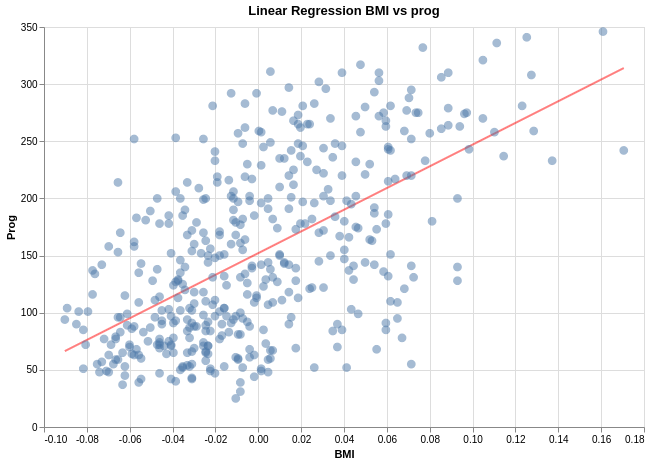

In [14]:
regr_bmi= LinearRegression(fit_intercept=True).fit(X[:,np.newaxis,2],y)

points = alt.Chart(diabetes_df).mark_circle(size=75, opacity=0.5).encode(
    x="bmi:Q",
    y="prog:Q"
).properties(
    width=600,
    height=400
)

reg_df=(
    diabetes_df.loc[lambda x: x["bmi"].isin([x["bmi"].min(), x["bmi"].max()])
        , ["bmi"]
                   ].assign(regression=lambda x: regr_bmi.intercept_ + x['bmi']*regr_bmi.coef_)
)

reg_line = alt.Chart(reg_df).mark_line(color="red", opacity=0.5).encode(
    x=alt.X("bmi:Q", title="BMI"),
    y=alt.Y("regression:Q",title="Prog")
).properties(
    title='Linear Regression BMI vs prog',
    width=600,
    height=400
)

reg_line+ points